In [1]:
# Libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
import ranking
import helper
import preprocess

In [15]:
pop_word_count = 3
groups, instance_ranks, ranks, scores, mapping = ranking.main("tapfish")
reverse_mapping = preprocess.get_reverse_mapping(mapping)
group_pop_words = []
for group in groups:
    group = np.array(group)
    #print(group.shape)
    word_count = np.count_nonzero(group, axis=0)
    pop_indices = word_count[np.argsort(word_count)[-pop_word_count:]]
    pop_words = [reverse_mapping[pop_idx] for pop_idx in pop_indices]
    group_pop_words.append(pop_words)
    #for pop_word in pop_words:
    #    print(pop_word, end=',')
    #print()
group_names = np.array([" ".join(pop_words) for pop_words in group_pop_words])

Data set: tapfish

BernoulliNB
Fitting....
Done Fitting.....

Instances sent to filter: 3558
Useful instances: 570



[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0.6257452164285994, 0.6034773998818626, 0.536119087054016, 0.5172167871732206, 0.365863192161642, 0.30985140727908833, 0.2989621274193842, 0.2909477510146154, 0.27135112431465924, 0.2428473694460458]
[1.5707963267948966, 0.9424777960769379, 0.3141592653589793, 5.969026041820607, 5.340707511102648, 4.71238898038469, 4.084070449666731, 3.4557519189487724, 2.827433388230814, 2.199114857512855, 1.5707963267948966]


<IPython.core.display.Javascript object>


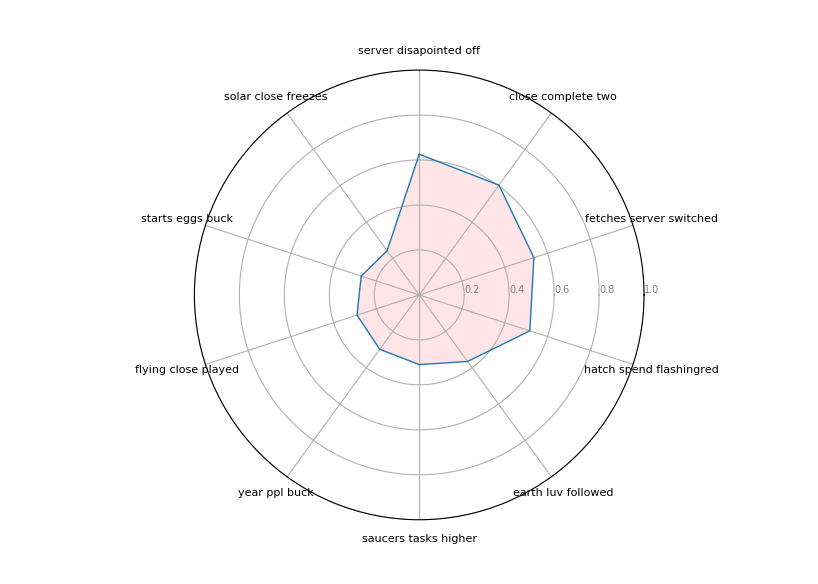

In [16]:
# Order all arrays based on decreasing order of scores
ordering = np.argsort(scores)[::-1]
group_names = group_names[ordering]
scores = scores[ordering]
ranks = ranks[ordering]
instance_ranks = np.array(instance_ranks)[ordering]

group_names = [group_name for _, group_name in sorted(zip(scores, group_names), reverse=True)]
scores = sorted(scores, reverse=True)

categories = group_names
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
# values += values[:1]
values = np.append(scores, scores[0])
print(ranks)
print(scores)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# angles = [n / float(N) * 2 * pi for n in range(N)]
angles = [(pi/2 - (2 * k * pi)/N if pi/2 - (2 * k * pi)/N > 0 else pi/2 - (2 * k * pi)/N + 2 * pi) for k in range(N)]
angles += angles[:1]
print(angles)

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="grey", size=7)
plt.ylim(0,1)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'r', alpha=0.1)

plt.show()